In [2]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11972 sha256=fd3277e4a58361b19c6d7abd657846b10495a48e3fe2af750d905ac38f036f5e
  Stored in directory: c:\users\roberto\appdata\local\pip\cache\wheels\1a\33\5a\05bbe93cd4709e7a777f8379efb54114a8f7f6dcb3787805fb
Successfully built empiricaldist


In [3]:
import pandas as pd
import numpy as np
import pyreadr as rr # package to use data from R format
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Cdf
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
rdata_read = rr.read_r("../../data/wage2015_subsample_inference.Rdata") # es una base de Rdata. Estoy saliendo tres carpetas hacia atrás


# Extracting the data frame from rdata_read
data = rdata_read[ 'data' ]


data.shape

(5150, 20)

In [5]:
data.head()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,,,
10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,3.24,5.832,10.4976,6260,19,770,4
18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25.0,6.25,15.625,39.0625,420,1,6990,12
19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22


## Description of variables

#### wage

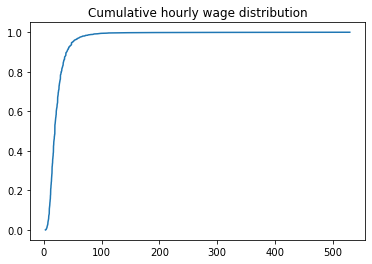

In [6]:
cdf_wage = Cdf.from_seq(data.wage)
# Cumulative probability
cdf_wage.plot()
plt.title('Cumulative hourly wage distribution') 
plt.show()

#### lwage

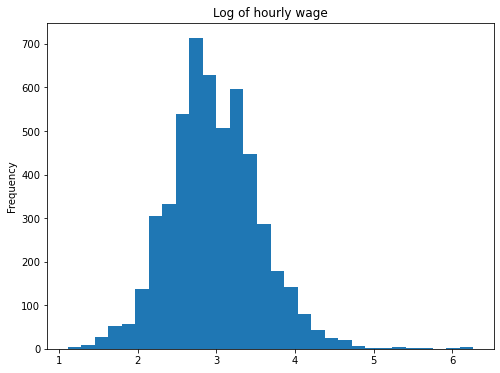

In [7]:
data['lwage'].plot(kind = 'hist', bins = 30, figsize = (8,6))
plt.title('Log of hourly wage')
plt.show()

#### Wage by sex 

[Text(0, 0, 'Men'), Text(1, 0, 'Women')]

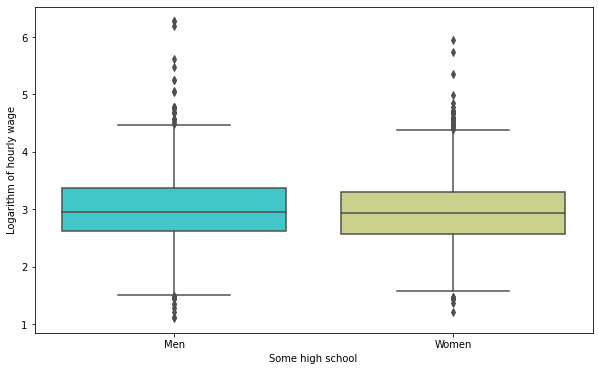

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="sex", y="lwage", data=data ,palette='rainbow')
plt.xlabel('Some high school')
plt.ylabel('Logarithm of hourly wage')
(box.set_xticklabels(["Men", "Women"]))

#### Education level

In [9]:
def educ(row):
    if row['shs']==1:
        return "Some high school"
    if row['hsg']==1:
        return "High school graduated"
    if row['scl']==1:
        return "Some college"
    if row['clg']==1:
        return "College graduate"
    if row['ad']==1:
        return "Advanced degree"

In [10]:
data['educ']=data.apply(lambda row: educ(row), axis=1)

Text(0, 0.5, 'Logarithm of hourly wage')

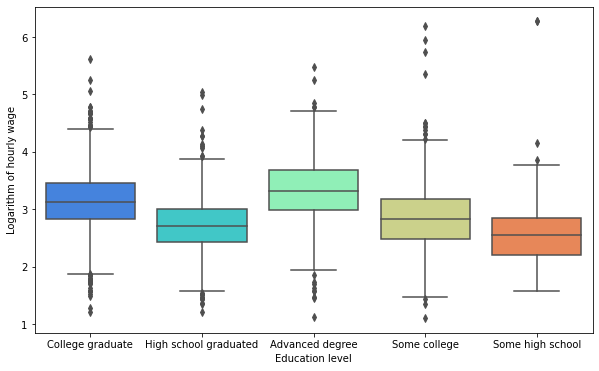

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="educ", y="lwage", data=data ,palette='rainbow')
plt.xlabel('Education level')
plt.ylabel('Logarithm of hourly wage')

#### Some high school

In [12]:
base = data.groupby([ 'sex' ]).sum()
base

,wage,lwage,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4
sex,,,,,,,,,,,,,,,
0.0,68719.104545,8548.180581,91.0,842.0,782.0,841.0,305.0,741.0,853.0,632.0,635.0,39436.0,8558.585,23174.60125,70377.478287
1.0,51844.507150,6751.370936,29.0,414.0,650.0,795.0,401.0,596.0,674.0,481.0,538.0,31431.0,6988.880,19240.11450,58980.415775


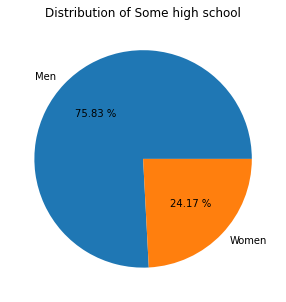

In [13]:
# Labels to correct categories names 

labels=['Men','Women']

plt.figure(figsize=(5,5))

ax = plt.pie(base['shs'],labels=labels, autopct='%.2f %%')
plt.title('Distribution of Some high school')
plt.show()

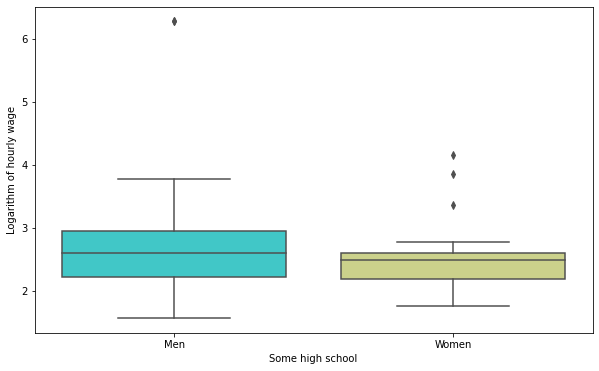

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="sex", y="lwage", data=data[data['shs']==1] ,palette='rainbow')
plt.xlabel('Some high school')
plt.ylabel('Logarithm of hourly wage')
(box.set_xticklabels(["Men", "Women"]))
plt.show()

### High school graduated

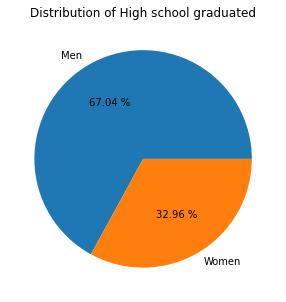

In [15]:
# Labels to correct categories names 

labels=['Men','Women']

plt.figure(figsize=(5,5))

ax = plt.pie(base['hsg'],labels=labels, autopct='%.2f %%')
plt.title('Distribution of High school graduated')
plt.show()

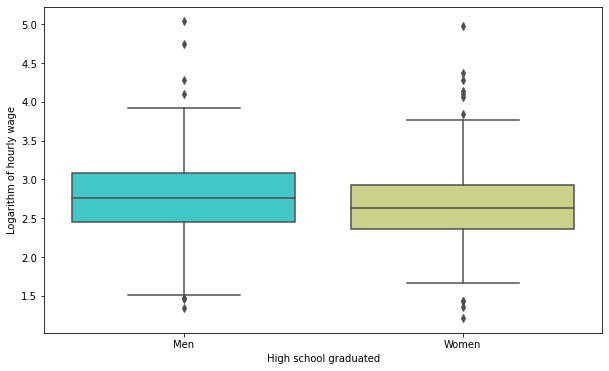

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="sex", y="lwage", data=data[data['hsg']==1] ,palette='rainbow')
plt.xlabel('High school graduated')
plt.ylabel('Logarithm of hourly wage')
(box.set_xticklabels(["Men", "Women"]))
plt.show()

### Replication paper

In [17]:
df1=data[((data['hsg']==1)|(data['clg']==1)) & (data['sex']==0)]

In [18]:
df1

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,...,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,educ
rownames,,,,,,,,,,,,,,,,,,,,,
12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9,College graduate
15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,18.0,3.24,5.832,10.4976,6260,19,770,4,High school graduated
44,19.230769,2.956512,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,37.0,13.69,50.653,187.4161,5240,17,5680,9,High school graduated
77,12.019231,2.486508,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,30.0,9.00,27.000,81.0000,4220,14,8270,18,High school graduated
113,27.884615,3.328075,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,16.0,2.56,4.096,6.5536,6355,19,770,4,High school graduated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32599,22.596154,3.117780,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,2.25,3.375,5.0625,9620,22,5390,9,High school graduated
32603,16.826923,2.822980,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.0,1.21,1.331,1.4641,7150,20,8770,21,High school graduated
32619,13.846154,2.628007,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,10.0,1.00,1.000,1.0000,800,2,770,4,College graduate


In [19]:
df2 = df1[(df1['hsg']==1)].groupby(['exp1','hsg']).agg( 
    {'lwage':['mean']} ).reset_index()
df2.columns=['exp1','hsg','lwage_mean_hsg']
df2

,exp1,hsg,lwage_mean_hsg
0,5.0,1.0,2.615219
1,6.0,1.0,2.669723
2,7.0,1.0,2.628311
3,8.0,1.0,2.753753
4,9.0,1.0,2.586999
5,10.0,1.0,2.781384
6,11.0,1.0,2.716139
7,12.0,1.0,2.734404
8,13.0,1.0,2.800573
9,14.0,1.0,2.824397


In [20]:
df3 = df1[(df1['clg']==1)].groupby(['exp1','clg']).agg( 
    {'lwage':['mean']} ).reset_index()
df3.columns=['exp1','clg','lwage_mean_clg']
df3

,exp1,clg,lwage_mean_clg
0,1.0,1.0,3.080935
1,2.0,1.0,3.108572
2,3.0,1.0,3.085729
3,4.0,1.0,3.130210
4,5.0,1.0,3.090935
5,6.0,1.0,3.142620
6,7.0,1.0,3.189323
7,8.0,1.0,3.219472
8,9.0,1.0,3.144192
9,10.0,1.0,3.256550


Text(0, 0.5, 'Log Wage (or Wage Gap)')

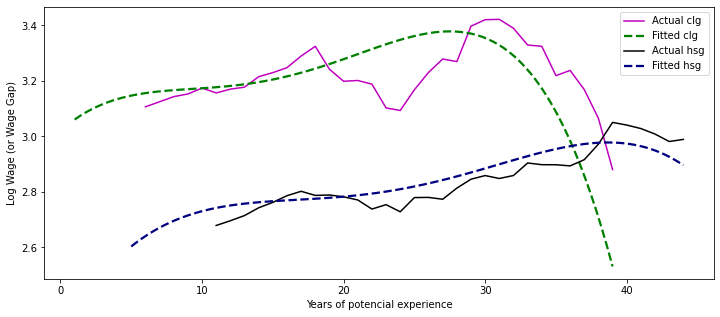

In [21]:
fig, ax = plt.subplots(figsize=(12,5))

x1 = df2.exp1
y1 = df2.lwage_mean_hsg
#y2 = df2.prediction1[(df2['clg']==1)]
x2 = df3.exp1
y2 = df3.lwage_mean_clg
ts = pd.Series(y1.values, index=x1.values)
mean_smoothed=ts.rolling(window=7).mean()

ts1 = pd.Series(y2.values, index=x2.values)
mean_smoothed1=ts1.rolling(window=6).mean()

#plt.plot(x1, y1, label ='Actual-hsg', color='blue')
#plt.plot(x, y2, label ='Fitted-HSH', color='red', linestyle='--')
#plt.plot(x2, y2, label ='Actual-clg', color='green')
#plt.plot(x, y4, label ='Fitted-HSH', color='red', linestyle='--')
plt.plot(mean_smoothed1, label = "",color='m')
#sns.lineplot(x=df1[df1['hsg']==0].exp1,y=df1[df1['hsg']==0].lwage,estimator=np.mean,color='r',ci=None)
#plt.plot(x2, y_new)
sns.regplot(x=df1[df1['hsg']==0].exp1,y=df1[df1['hsg']==0].lwage,order=4,scatter=False,x_jitter=.001,x_estimator=np.mean,fit_reg=True,ci=None, color="green")
plt.plot(mean_smoothed, label = "",color='k')
sns.regplot(x=df1[df1['hsg']==1].exp1,y=df1[df1['hsg']==1].lwage,order=4,scatter=False,x_jitter=.001,x_estimator=np.mean,fit_reg=True,ci=None, color="navy")
ax.lines[1].set_linestyle("--")
ax.lines[3].set_linestyle("--")

plt.legend(['Actual clg','Fitted clg','Actual hsg','Fitted hsg'])
#plt.legend(loc='upper right')
plt.xlabel('Years of potencial experience')
plt.ylabel('Log Wage (or Wage Gap)')


## 5. Interval confidence of sex coefficient

## Ols regression basic 

In [22]:
nocontrol_model = smf.ols( formula = 'lwage ~ sex', data = data ).fit()
nocontrol_est = nocontrol_model.summary2().tables[1]['Coef.']['sex'] #tables [1] porque me genera tres tablas
nocontrol_se2 = nocontrol_model.summary2().tables[1]['Std.Err.']['sex'] #error estándar sin ajuste

HCV_coefs = nocontrol_model.cov_HC0 #error estándar robusto por heterocedasticidad. cov_HCO es matriz de varianzas-covarianzas
nocontrol_se = np.power( HCV_coefs.diagonal() , 0.5)[1] #en la diagonal están las varianzas y le saco la raiz cuadrada
# nocontrol_se es el error estándar
# Recordar que el ajuste de errores estándar no cambia los betas


# print unconditional effect of gender and the corresponding standard error

print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding standard error is {nocontrol_se2}' )
print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding robust standard error is {nocontrol_se}','\n' )

nocontrol_model.conf_int( alpha=0.05 ).loc[['sex']]

The estimated gender coefficient is -0.03834473367441503 and the corresponding standard error is 0.015987825519430437
The estimated gender coefficient is -0.03834473367441503 and the corresponding robust standard error is 0.0159019350790958 



,0,1
sex,-0.069688,-0.007002


In [23]:
err_series = nocontrol_model.params - nocontrol_model.conf_int()[0]
coef_df = pd.DataFrame({'coef': nocontrol_model.params.at['sex'],
                        'err': err_series.at['sex'],
                        'varname': ['OLS no control']
                       })
coef_df

,coef,err,varname
0,-0.038345,0.031343,OLS no control


## Ols regression with controls

In [24]:
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'

# The smf api replicates R script when it transform data
control_model = smf.ols( formula = flex, data = data ).fit()
control_est = control_model.summary2().tables[1]['Coef.']['sex']

print(control_model.summary2().tables[1])

HCV_coefs = control_model.cov_HC0
control_se = np.power( HCV_coefs.diagonal() , 0.5)[42] #¿por qué el 1 cambió a 42?

print( f"Coefficient for OLS with controls {control_est} and the corresponding robust standard error is {control_se}" )

# confidence interval
control_model.conf_int( alpha=0.05 ).loc[['sex']] #intervalo de confianza al 95%


               Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
Intercept   3.279677  0.284196  11.540202  2.037819e-30  2.722526  3.836828
occ2[T.10]  0.020954  0.156498   0.133896  8.934903e-01 -0.285852  0.327761
occ2[T.11] -0.642418  0.309090  -2.078417  3.772286e-02 -1.248372 -0.036463
occ2[T.12] -0.067477  0.252049  -0.267716  7.889294e-01 -0.561605  0.426651
occ2[T.13] -0.232978  0.231538  -1.006220  3.143593e-01 -0.686896  0.220940
...              ...       ...        ...           ...       ...       ...
exp4:scl    0.021076  0.024529   0.859230  3.902557e-01 -0.027012  0.069164
exp4:clg    0.007869  0.022753   0.345868  7.294565e-01 -0.036736  0.052475
exp4:mw     0.006244  0.015870   0.393446  6.940073e-01 -0.024868  0.037356
exp4:so     0.000314  0.013628   0.023075  9.815913e-01 -0.026402  0.027031
exp4:we     0.001768  0.015960   0.110804  9.117763e-01 -0.029521  0.033058

[246 rows x 6 columns]
Coefficient for OLS with controls -0.06955320329684106 and the c

,0,1
sex,-0.099387,-0.039719


In [25]:
err_series1 = control_model.params - control_model.conf_int()[0]
coef_df1 = pd.DataFrame({'coef': control_model.params.at['sex'],
                        'err': err_series1.at['sex'],
                        'varname': ['OLS control']
                       })
coef_df1

,coef,err,varname
0,-0.069553,0.029834,OLS control


## Partialling-Out using ols

In [26]:
# models
# model for Y
flex_y = 'lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'
# model for D
flex_d = 'sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)' 

# partialling-out the linear effect of W from Y
t_Y = smf.ols( formula = flex_y , data = data ).fit().resid # resid para obtener los residuos

# partialling-out the linear effect of W from D
t_D = smf.ols( formula = flex_d , data = data ).fit().resid

data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] ) #estoy uniendo estas dos columnas. t_y es y ubleado
# .T es transpuesta
# regression of Y on D after partialling-out the effect of W
partial_fit =  smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_est = partial_fit.summary2().tables[1]['Coef.']['t_D']


# standard error
HCV_coefs = partial_fit.cov_HC0
partial_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

print( f"Coefficient for D via partialling-out {partial_est} and the corresponding robust standard error is {partial_se}" )

# confidence interval
partial_fit.conf_int( alpha=0.05 ).loc[['t_D']]


Coefficient for D via partialling-out -0.06955320329684592 and the corresponding robust standard error is 0.015000474421753325


,0,1
t_D,-0.098671,-0.040435


In [27]:
err_series2 = partial_fit.params - partial_fit.conf_int()[0]
coef_df2 = pd.DataFrame({'coef': partial_fit.params.at['t_D'],
                        'err': err_series2.at['t_D'],
                        'varname': ['OLS P-O']
                       })
coef_df2

,coef,err,varname
0,-0.069553,0.029118,OLS P-O


In [28]:
concat = pd.concat([coef_df,coef_df1,coef_df2])
concat

,coef,err,varname
0,-0.038345,0.031343,OLS no control
0,-0.069553,0.029834,OLS control
0,-0.069553,0.029118,OLS P-O


C:\Users\Roberto\AppData\Local\Temp\ipykernel_7144\2996988909.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(concat.shape[0]),


Text(0.5, 1.0, 'Interval confidence of sex coefficient')

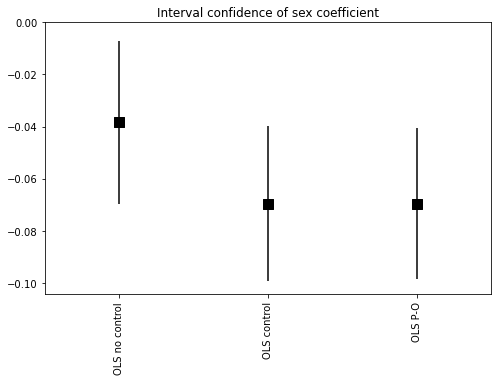

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))
concat.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(concat.shape[0]), 
        marker='s', s=120, 
        y=concat['coef'], color='black')
plt.title('Interval confidence of sex coefficient')
#ax.axhline(y=0, linestyle='--', color='black', linewidth=4)

## 6. Frisch-Waugh-Lovell Theorem Proof

Let the following equation

$$\overset{nx1}y=\overset{nxk_1}D \overset{k_1x1}\beta_1 + \overset{nxk_2}W \overset{k_2x1}\beta_2+\overset{nx1}\mu$$

Where $y$ is the vector of dependent variables, $D$ is a matrix of regresors (in this particular case, it will represent the variable "sex") , $\beta_1$ is the coefficient vector asocciated to D, W is the matrix of all other dependent variables, $\beta_2$ the coefficient vector asocciated to W, and $\mu$ the vector of innovations.

The Frisch-Waugh-Lovell Theorem states that we can obtain $\beta_1$ through the alternative regression:

$$\epsilon^y = \epsilon^D \psi+\xi $$


#### 1. First Step

First, we need to regress

$$y=W \alpha_1 +\epsilon^y  $$

The resulting estimated coefficient vector is:

$$\widehat{\alpha_1} = (W^{'}W)^{-1}W^{'}y$$

Thus, the estimated error vector:

$$\widehat{\epsilon^y } = y-W(W^{'}W)^{-1}W^{'}y = \left[I - W(W^{'}W)^{-1}W^{'}\right]y$$

Now, defining $ M = \left[I - W(W^{'}W)^{-1}W^{'}\right]$, and rewriting last expression:

$$\widehat{\epsilon^y } = My$$

#### 2. Second Step

Now lets regress

$$D = W \gamma_1 + \epsilon^D $$

The resulting estimated coefficient vector is:

$$\widehat{\gamma_1} = (W^{'}W)^{-1}W^{'}D$$

Thus, the estimated error vector:

$$\widehat{\epsilon^D} = D-W(W^{'}W)^{-1}W^{'}D = \left[I - W(W^{'}W)^{-1}W^{'}\right]D$$

$$\widehat{\epsilon^D} = MD$$

#### 3. Third Step

Finally, we need to regress

$$\widehat{\epsilon^y} = \widehat{\epsilon^D}\psi + \xi$$

The estimated coefficient (in this case, $\psi$ is a scalar) is:

$$\widehat{\psi} = \left(\widehat{\epsilon^D}^{'}\widehat{\epsilon^D}\right)^{-1}\widehat{\epsilon^D}^{'}\widehat{\epsilon^y}$$

$$\widehat{\psi} = \left(D'M'MD\right)^{-1}D'M'My$$

Notice that

$$M'M = \left[I - W(W^{'}W)^{-1}W^{'}\right]\left[I - W(W^{'}W)^{-1}W^{'}\right]$$
$$M'M = I - W(W^{'}W)^{-1}W^{'} - W(W^{'}W)^{-1}W^{'} + W(W^{'}W)^{-1}W^{'}W(W^{'}W)^{-1}W^{'}$$
$$M'M = I - W(W^{'}W)^{-1}W^{'} = M $$

Then

$$\widehat{\psi} = \left(D'MD\right)^{-1}D'My$$

*Is $\psi$ the same as $\beta_1$?* To prove this, we will make us of partial regressions.


Given the initial model:

$$y=D \beta_1 + W \beta_2+\mu$$


$$y = \begin{array}{ccc}
[D & \vdots & W]\end{array}\left[\begin{array}{c}
\beta_{1}\\
\cdots\\
\beta_{2}
\end{array}\right]+\mu$$

The estimated coefficients are given by the vector $\widehat\beta$:

$$\widehat{\beta} = (\begin{array}{ccc}
[D & \vdots & W]'\end{array}\begin{array}{ccc}
[D & \vdots & W]\end{array})^{-1}\begin{array}{ccc}
[D & \vdots & W]'\end{array}y$$ 

$$\widehat{\beta} = \left(\left[\begin{array}{c}
D'\\
\cdots\\
W'
\end{array}\right]\begin{array}{ccc}
[D & \vdots & W]\end{array}\right)^{-1}\left[\begin{array}{c}
D'\\
\cdots\\
W'
\end{array}\right]y$$

We can transform the last expression to a system of equations:

$$\widehat{\beta} = \left[\begin{array}{c}
\widehat{\beta_{1}}\\
\cdots\\
\widehat{\beta_{2}}
\end{array}\right] = \left(\begin{array}{ccc}
D'D & \vdots & D'W\\
\cdots &  & \cdots\\
W'D & \vdots & W'W
\end{array}\right)^{-1}\left[\begin{array}{c}
D'y\\
\cdots\\
W'y
\end{array}\right]$$

$$\left(\begin{array}{ccc}
D'D & \vdots & D'W\\
\cdots &  & \cdots\\
W'D & \vdots & W'W
\end{array}\right)\left[\begin{array}{c}
\widehat{\beta_{1}}\\
\cdots\\
\widehat{\beta_{2}}
\end{array}\right] = \left[\begin{array}{c}
D'y\\
\cdots\\
W'y
\end{array}\right]$$

$$D'D\widehat{\beta_{1}}+D'W\widehat{\beta_{2}}=D'y$$

$$W'D\widehat{\beta_{1}}+W'W\widehat{\beta_{2}}=W'y$$

To make the problem easier to solve, consider the following substitutions:

$$A\widehat{\beta_{1}}+B\widehat{\beta_{2}}=C$$

$$X\widehat{\beta_{1}}+Y\widehat{\beta_{2}}=Z$$

Then:

$$\widehat{\beta_{2}}=Y^{-1}(Z-X\widehat{\beta_{1}})$$

$$A\widehat{\beta_{1}}+BY^{-1}(Z-X\widehat{\beta_{1}})=C$$

$$A\widehat{\beta_{1}}+BY^{-1}Z-BY^{-1}X\widehat{\beta_{1}}=C$$

$$(A-BY^{-1}X)\widehat{\beta_{1}}=C-BY^{-1}Z$$

Finally, replacing terms:

$$(D'D-D'W(W'W)^{-1}W'D)\widehat{\beta_{1}}=D'y-D'W(W'W)^{-1}W'y$$

$$D'(I-W(W'W)^{-1}W')D\widehat{\beta_{1}}=D'(I-W(W'W)^{-1}W')y$$

Recall that $M =\left[I - W(W^{'}W)^{-1}W^{'}\right]$. Then:

$$D'MD\widehat{\beta_{1}}=D'My$$

$$\widehat{\beta_{1}}=(D'MD)^{-1}D'My$$

